In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [53]:
# Carregar dados
market_data = pd.read_csv("Global-finance-data.csv")

C:\Users\nicor\AppData\Local\Temp\ipykernel_5700\3585930897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gdp, x="Country", y="GDP_Growth_Rate_Percent", palette="viridis")


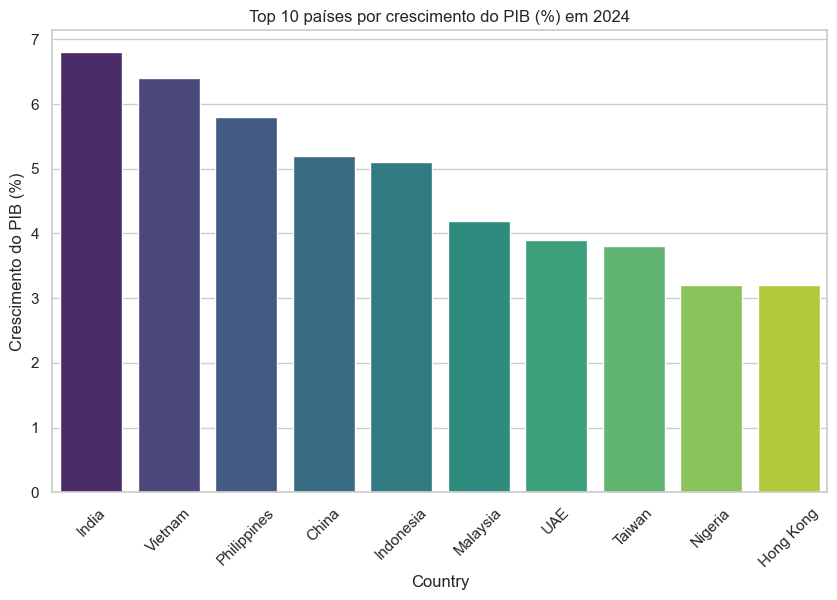

In [54]:
# 1. Top 10 países por PIB
df_gdp = market_data.sort_values("GDP_Growth_Rate_Percent", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=df_gdp, x="Country", y="GDP_Growth_Rate_Percent", palette="viridis")
plt.title("Top 10 países por crescimento do PIB (%) em 2024")
plt.xticks(rotation=45)
plt.ylabel("Crescimento do PIB (%)")
plt.show()

C:\Users\nicor\AppData\Local\Temp\ipykernel_5700\434699802.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_infl, x="Country", y="Inflation_Rate_Percent", palette="coolwarm")


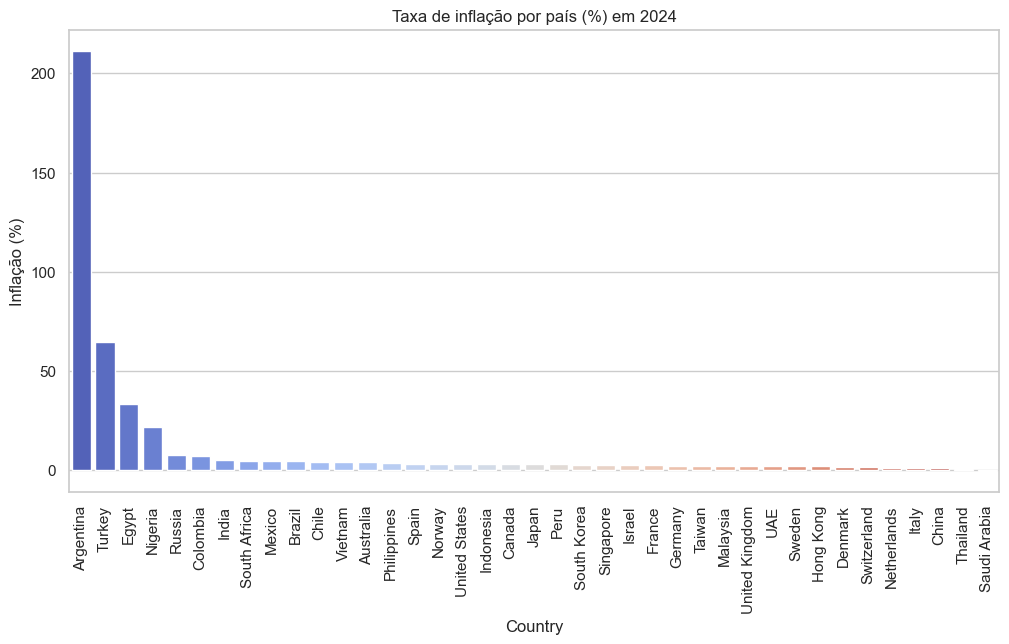

In [55]:
# 2. Inflação por país (ordenado)
df_infl = market_data.sort_values("Inflation_Rate_Percent", ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=df_infl, x="Country", y="Inflation_Rate_Percent", palette="coolwarm")
plt.title("Taxa de inflação por país (%) em 2024")
plt.xticks(rotation=90)
plt.ylabel("Inflação (%)")
plt.show()


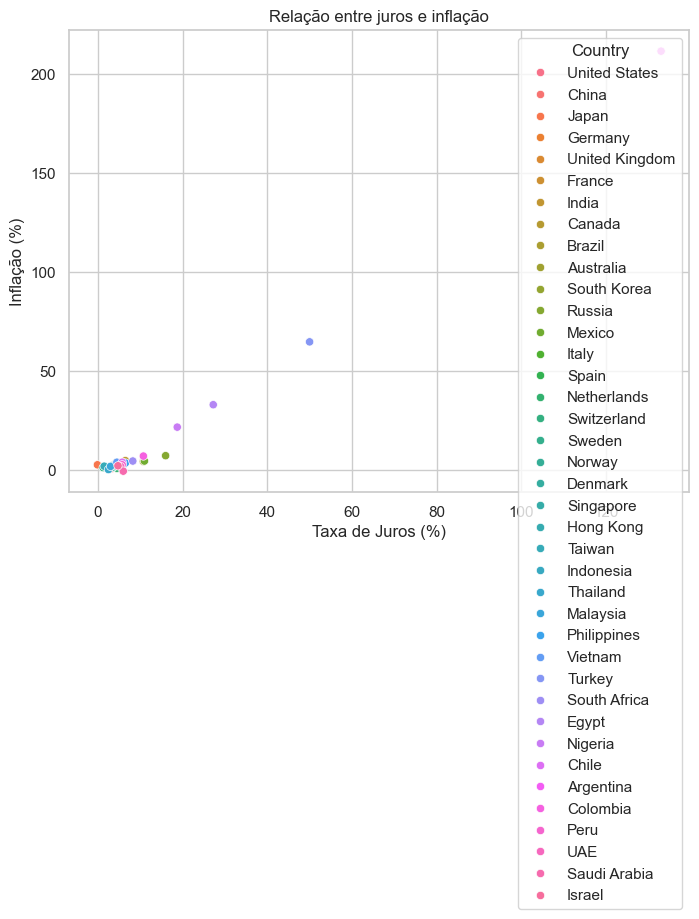

In [56]:
# 3. Juros vs Inflação (dispersão)
plt.figure(figsize=(8,6))
sns.scatterplot(data=market_data, x="Interest_Rate_Percent", y="Inflation_Rate_Percent", hue="Country")
plt.title("Relação entre juros e inflação")
plt.xlabel("Taxa de Juros (%)")
plt.ylabel("Inflação (%)")
plt.show()

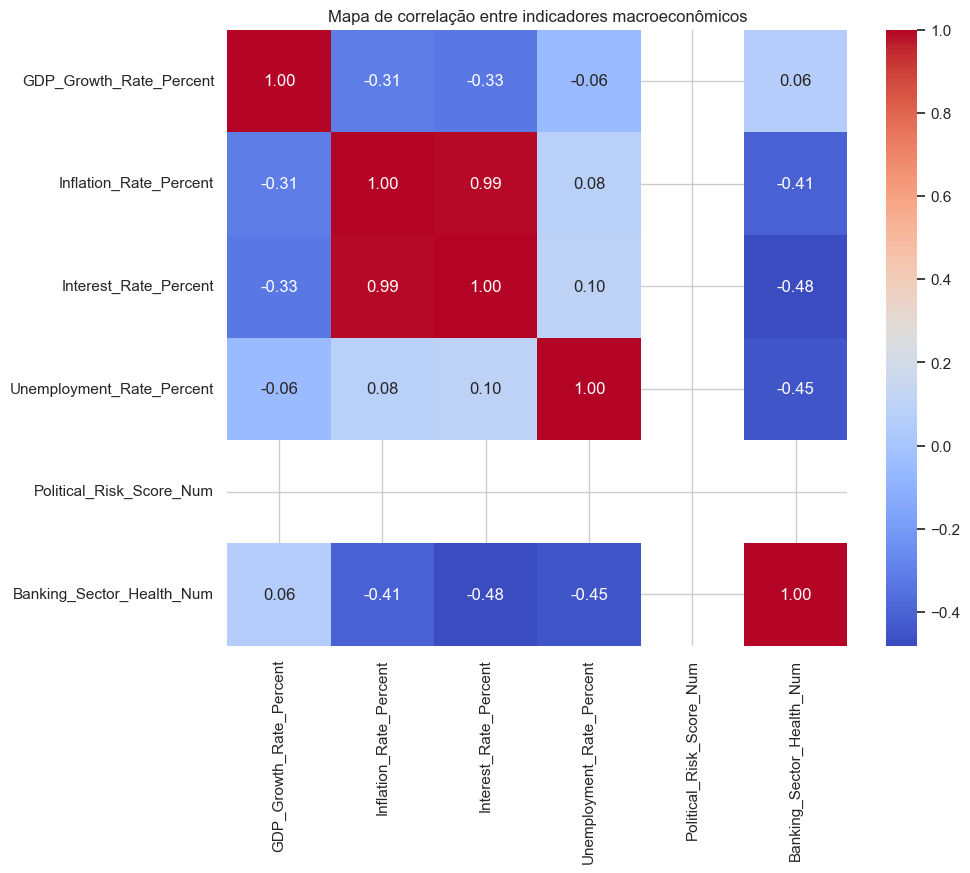

In [58]:
# 4. Heatmap de correlação
plt.figure(figsize=(10,8))
# Mapear valores categóricos para numéricos
risk_map = {"Low": 1, "Moderate": 2, "High": 3, "Strong": 4}
health_map = {"Weak": 1, "Moderate": 2, "Strong": 3}
market_data["Political_Risk_Score_Num"] = market_data["Political_Risk_Score"].map(risk_map)
market_data["Banking_Sector_Health_Num"] = market_data["Banking_Sector_Health"].map(health_map)

# Calcular correlação usando colunas numéricas
corr = market_data[[
    "GDP_Growth_Rate_Percent","Inflation_Rate_Percent",
    "Interest_Rate_Percent","Unemployment_Rate_Percent",
    "Political_Risk_Score_Num","Banking_Sector_Health_Num"
]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlação entre indicadores macroeconômicos")
plt.show()

C:\Users\nicor\AppData\Local\Temp\ipykernel_5700\1966712329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_risk, x="Country", y="Political_Risk_Score", palette="magma")


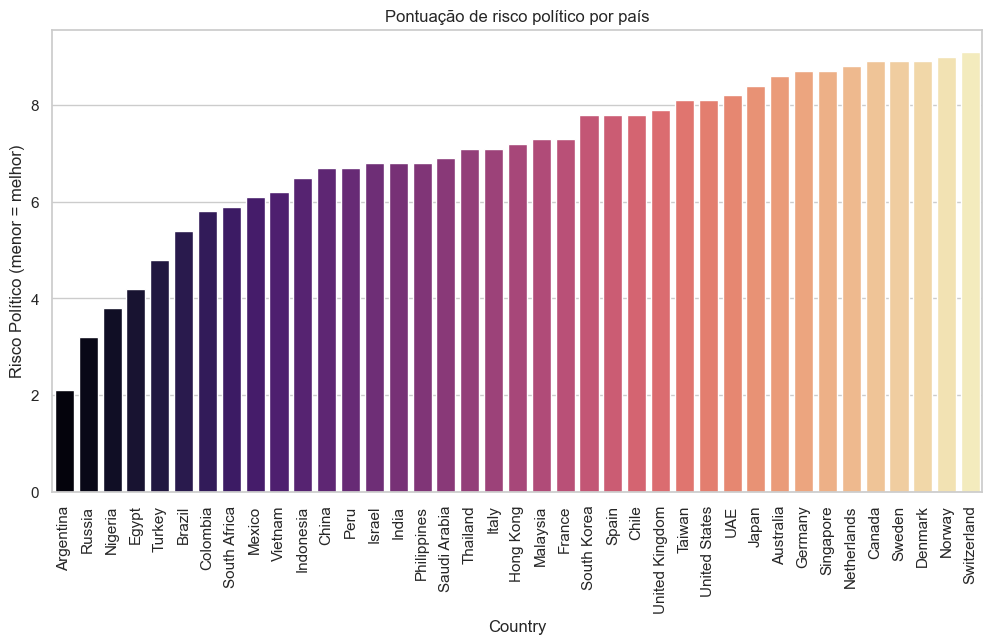

In [59]:
# 5. Risco político por país
df_risk = market_data.sort_values("Political_Risk_Score", ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=df_risk, x="Country", y="Political_Risk_Score", palette="magma")
plt.title("Pontuação de risco político por país")
plt.xticks(rotation=90)
plt.ylabel("Risco Político (menor = melhor)")
plt.show()